# BCB546X - Python Assignment - Lyle Sisson

# Functions of the Script

## Question 1

### We first need to import the necessary packages and ensure they are installed.

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

### This is the code Dr. X provided that needs to be annotated.

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

This code obtains the sequence that we need to use, which must be a fasta file. First, an empty dictionary is created called "sequence_data_dict". For each "record" in the fasta file, the for loop does the following steps: First, the header of the fasta file is split out using "record.description.split()". Each element of the header is distinguished by blank space. Then, the species name is pulled out in the second line using columns 2 and 3, which gives us the taxonomic classification of the organism we got the DNA from. The last step is to add the DNA to our sequence dictionary using the species name as the index.

## Question 2

### We need to create a function that translates sequences into amino acids

In [3]:
def translation_fxn(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = " "
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]
        if (codon == "TAG" or codon == "TAA" or codon == "AGA" or codon == "AGG"):
            break
        else: 
            aa_seq_string += mito_table.forward_table[codon]
    return aa_seq_string

This function works by accessing the codon table on NCBI, specifically the "Vertebrate Mitochondrial" table. A new string variable is created called "aa_seq_string". The for loop ranges from 0 to the length of the nucleotide string and counts by 3. Within the for loop, the codon is defined by indexing the "string_nucleotides" variable from i to i plus 3, which gives a 3 base string. The loop then checks if the codon is one of the stop codons; if it is, the loop terminates and the "aa_seq_string" is returned. If the codon is not a stop codon, it is translated according to the table and added to "aa_seq_string". Once the for loop has completed (if not terminated early due to stop codon), the "aa_seq_string" will be returned. The stop codons were determined by looking at the table that was selected.

# Question 3

### What is an alternate translation function?

In [4]:
def alt_translation_function(string_nucleotides):
    cdna = Seq(string_nucleotides, IUPAC.unambiguous_dna)
    aa_seq = cdna.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return(aa_seq)

This function works by accessing the codon table on NCBI, specifically the "Vertebrate Mitochondrial" table. A seq object named "cdna" is made that contains the "string_nucleotides" variable and the type of codon table to be used (ambiguous versus unambiguous and dna versus rna). The ".translate" function is told which specific table to use and whether or not to stop at the first stop codon encountered while translating the sequence provided from "cdna". This was found on the Biopython Tutorial and Cookbook (http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25).

# Question 4

### We need a function to determine the molecular weight of an amino acid sequence

In [5]:
def molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    molecular_weight = analysed_seq.molecular_weight()
    return(molecular_weight)

This function works by running the amino acid string through the "ProteinAnalysis" module within BioPython and the resulting output can be used to calculate various characteristics of the protein. After the protein string is analysed, the molecular weight is assigned to a variable using the command ".molecular_weight()". The molecular weight is then returned. This module was found on the "ProtParam" module website (https://biopython.org/wiki/ProtParam).

# Question 5

### We need a function that calculates the GC-content of a DNA string 

In [6]:
def GC_Content(string_nucleotides):
    return(GC(string_nucleotides))

This function makes use of the "GC" module within BioPython. The function "GC" takes a string of nucleotides and calculates the GC-percentage and returns the value as a float. This module was found on the Bio.SeqUtils help website (http://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html).

# Main Part of the Script

### Question 6

### The data needs to be pulled into Python first

In [7]:
bear_mass_df = pd.read_csv("bears_mass.csv")
bear_cytb_seq = get_sequences_from_file("bears_cytb.fasta")
species_list = list(bear_mass_df.species)

In [8]:
bear_mass_df['Molecular_Weight'] = 'NaN'
bear_mass_df['GC_Content'] = 'NaN'

This two line command adds two new columns, "Molecular Weight" and "GC_Content", and fills in the values with NaN, which indicates there is not a number in the cell.

# Question 7

### The columns "Molecular Weight" and "GC_Content" need to be filled in

In [9]:
for bear, row in bear_mass_df.iterrows():
    aa_seq = translation_fxn(bear_cytb_seq[row['species']])
    bear_mw = molecular_weight(aa_seq)
    bear_gc = GC_Content(bear_cytb_seq[row['species']])
    bear_mass_df.loc[bear, 'Molecular_Weight'] = bear_mw
    bear_mass_df.loc[bear, 'GC_Content'] = bear_gc

/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:163: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


The "for loop" loops through each bear species and row in the bear_mass dataframe; the proper sequence is obtained by accessing the row in the bear_cytb_seq and pulling the sequence according to the species name. Within each step of the loop, the amino acid sequence for each species is first pulled using the "species" identifier to pull the DNA sequence and then translate that using the "translation_fxn". The molecular weight is then obtained for each amino acid sequence using the "molecular_weight" function and the GC-content is calculated using the "GC_Content" function. Finally, the values are added to the data frame using a ".loc" attribute which allows indexing of the row first followed by the column index to specify the appropriate cell. 

# Question 8

### Bar Chart of Adult-Body Mass vs. Species

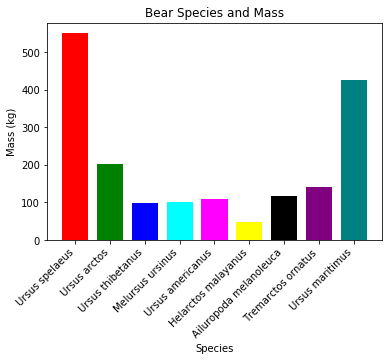

In [25]:
plt.bar(species_list, bear_mass_df.mass, width = 0.75, color = ('Red', 'Green', 'Blue', 'Cyan', 'Magenta', 'Yellow', 'Black', 'Purple', 'Teal'))
plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Species')
plt.ylabel('Mass (kg)')
plt.title('Bear Species and Mass')
plt.show()

This graph is generated using the "matplotlib.pyplot" and "numpy" packages. The largest bear species is Ursus spelaeus. They are a now extinct species of bears known as Cave Bears; they are believed to have gone extinct approximately 24,000 years ago. This module was found on the following website: https://pythonspot.com/matplotlib-bar-chart/.

# Question 9

### Graph of Molecular Weight as a function of GC-Content

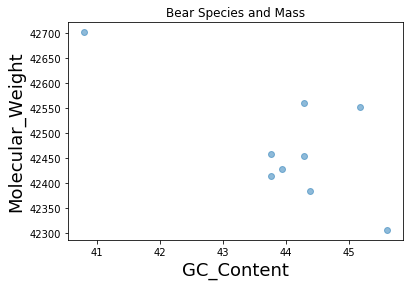

In [19]:
plt.scatter(bear_mass_df.GC_Content, bear_mass_df.Molecular_Weight, alpha=0.5)
plt.xlabel('GC_Content', fontsize=18)
plt.ylabel('Molecular_Weight', fontsize=18)
plt.title('Bear Species and Mass')
plt.show()

The same module was used to make this graph and the previous graph.

# Question 10

### Need to write the bear_mass_df to a CSV file

In [12]:
bear_mass_df.to_csv("Bear_Mass_Cytb.csv", index = False)

The file now contains the information that was in bear_mass_df.